# Pre-requisite

In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
#import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv('email.csv')

# Exploratory Data Analysis

In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Menampilkan 5 Random Sample dari Spam Email
df[df['Category'] == 'spam'].sample(n=5)

,Category,Message
505,spam,#ERROR!
5237,spam,Someonone you know is trying to contact you vi...
5427,spam,Santa Calling! Would your little ones like a c...
2525,spam,FREE entry into our £250 weekly comp just send...
4108,spam,HOT LIVE FANTASIES call now 08707500020 Just 2...


In [ ]:
#Menampilkan 5 Random Sample dari Non-Spam Email
df[df['Category'] == 'ham'].sample(n=5)

,Category,Message
3004,ham,I will see in half an hour
5441,ham,"By the way, make sure u get train to worc fore..."
2512,ham,Er yep sure. Props?
3657,ham,Oh really?? Did you make it on air? What's you...
3551,ham,Dad wanted to talk about the apartment so I go...


In [ ]:
#Tipe Data
print(df.dtypes)

Category    object
Message     object
dtype: object


Category
ham               4825
spam               747
{"mode":"full"       1
Name: count, dtype: int64


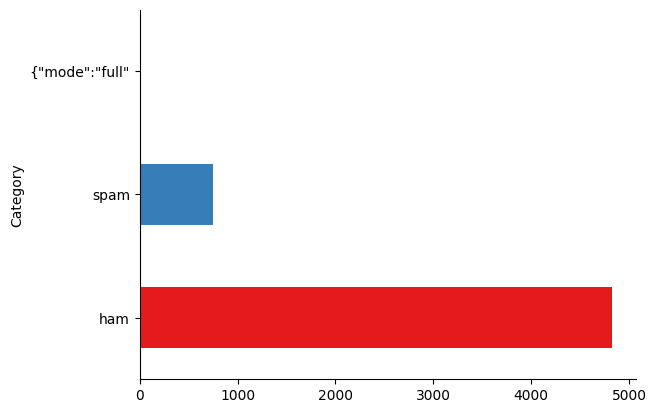

In [ ]:
#Menampilkan jumlah masing-masing tipe email
df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)
count=df['Category'].value_counts()
print(count)

In [ ]:
#Menampilkan jumlah baris yang Null
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


# Preprocessing

In [ ]:
#Mengambil 1 sample dari masing masing tipe E-mail
ham = df[df["Category"]== "ham"]
spam = df[df["Category"]== "spam"]

sampleS = spam.sample()
spam.drop(sampleS.index)
sampleH = ham.sample()
ham.drop(sampleH.index)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#melakukan Undersampling untuk menyamakan total row email yang spam dan ham
ham = ham.sample(spam.shape[0])

In [ ]:
print("E-mail ham = ",len(ham))
print("E-mail Spam = ",len(spam))

E-mail ham =  747
E-mail Spam =  747


In [ ]:
df= pd.concat([ham, spam], ignore_index = True)
df.shape

(1494, 2)

In [ ]:
X = df["Message"].values
y = df["Category"].values

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [ ]:
print(df.isnull().sum())

Category    0
Message     0
dtype: int64


In [ ]:
testH_X = sampleH["Message"].values
testH_Y = sampleH["Category"].values

testS_X = sampleS["Message"].values
testS_Y = sampleS["Category"].values

# Model

## Random Forest

In [ ]:
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])
forest = classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.9175946547884187

### Hyperparameter Tuning(estimator = 1000)

In [ ]:
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=1000))])
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=1000))])

In [ ]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.9487750556792873

In [ ]:
#test running time Spam Email
i = 1;
avgS = 0;
while i<=5:
    start = time.time()
    s_y_pred = classifier.predict(testS_X)
    end = time.time()
    print("Hasil =",testS_Y == s_y_pred)
    print("Running Time",i,"=",end - start)
    avgS += end - start
    i+=1
print("Rata-rata running time =",avgS/5)

Hasil = [ True]
Running Time 1 = 0.07215452194213867
Hasil = [ True]
Running Time 2 = 0.06078600883483887
Hasil = [ True]
Running Time 3 = 0.05576896667480469
Hasil = [ True]
Running Time 4 = 0.051583290100097656
Hasil = [ True]
Running Time 5 = 0.06444334983825684
Rata-rata running time = 0.060947227478027347


In [ ]:
#test running time Ham Email
i = 1;
avgP = 0;
while i<=5:
    start = time.time()
    p_y_pred = classifier.predict(testH_X)
    end = time.time()
    print("Hasil =",testH_Y == p_y_pred)
    print("Running Time",i,"=",end - start)
    avgP += end - start
    i+=1
print("Rata-rata running time =",avgP/5)

Hasil = [ True]
Running Time 1 = 0.0626058578491211
Hasil = [ True]
Running Time 2 = 0.055106163024902344
Hasil = [ True]
Running Time 3 = 0.0547490119934082
Hasil = [ True]
Running Time 4 = 0.061899662017822266
Hasil = [ True]
Running Time 5 = 0.05892014503479004
Rata-rata running time = 0.058656167984008786


In [ ]:
print("Running Time Random Forest =", ((avgP/5)+(avgS/5))/2)

Running Time Random Forest = 0.059801697731018066


## SVM

In [ ]:
SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 100, gamma = "auto"))])
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=100, gamma='auto'))])

In [ ]:
svm_y_pred = SVM.predict(x_test)
accuracy_score(y_test,svm_y_pred )

0.8530066815144766

### Hyperparameter Tuning (C = 5000 & C = 1000)

In [ ]:
SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 1000, gamma = "auto"))])
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=1000, gamma='auto'))])

In [ ]:
svm_y_pred = SVM.predict(x_test)
accuracy_score(y_test,svm_y_pred )

0.9576837416481069

In [ ]:
SVM = Pipeline([("tfidf", TfidfVectorizer()),("SVM", SVC(C = 5000, gamma = "auto"))])
SVM.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('SVM', SVC(C=5000, gamma='auto'))])

In [ ]:
svm_y_pred = SVM.predict(x_test)
accuracy_score(y_test,svm_y_pred )

0.9599109131403119

In [ ]:
#test running time Spam Email
i = 1;
avgS = 0;
while i<=5:
    start = time.time()
    s_y_pred = SVM.predict(testS_X)
    end = time.time()
    print("Hasil =",testS_Y == s_y_pred)
    print("Running Time",i,"=",end - start)
    avgS += end - start
    i+=1
print("Rata-rata running time =",avgS/5)

Hasil = [ True]
Running Time 1 = 0.0036211013793945312
Hasil = [ True]
Running Time 2 = 0.002307891845703125
Hasil = [ True]
Running Time 3 = 0.002824068069458008
Hasil = [ True]
Running Time 4 = 0.0013780593872070312
Hasil = [ True]
Running Time 5 = 0.0029625892639160156
Rata-rata running time = 0.002618741989135742


In [ ]:
#test running time Ham Email
i = 1;
avgP = 0;
while i<=5:
    start = time.time()
    p_y_pred = SVM.predict(testH_X)
    end = time.time()
    print("Hasil =",testH_Y == p_y_pred)
    print("Running Time",i,"=",end - start)
    avgP += end - start
    i+=1
print("Rata-rata running time =",avgP/5)

Hasil = [ True]
Running Time 1 = 0.003430604934692383
Hasil = [ True]
Running Time 2 = 0.0034377574920654297
Hasil = [ True]
Running Time 3 = 0.0022029876708984375
Hasil = [ True]
Running Time 4 = 0.002701997756958008
Hasil = [ True]
Running Time 5 = 0.0018072128295898438
Rata-rata running time = 0.0027161121368408205


In [ ]:
print("Running Time SVM =", ((avgP/5)+(avgS/5))/2)

Running Time SVM = 0.0026674270629882812


## Adaboost

In [ ]:
# Membuat pipeline untuk algoritma AdaBoost
adaboost_classifier = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("classifier", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50))
])

In [ ]:
# Melatih model menggunakan pipeline AdaBoost
adaboost_model = adaboost_classifier.fit(X_train, y_train)

In [ ]:
# Memprediksi menggunakan model AdaBoost yang telah dilatih
y_pred_adaboost = adaboost_model.predict(x_test)

In [ ]:
# Menghitung akurasi
accuracy_score(y_test,y_pred_adaboost )

0.9198218262806236

In [ ]:
#test running time Spam Email
i = 1;
avgS = 0;
while i<=5:
    start = time.time()
    s_y_pred = adaboost_classifier.predict(testS_X)
    end = time.time()
    print("Hasil =",testS_Y == s_y_pred)
    print("Running Time",i,"=",end - start)
    avgS += end - start
    i+=1
print("Rata-rata running time =",avgS/5)

Hasil = [ True]
Running Time 1 = 0.028649568557739258
Hasil = [ True]
Running Time 2 = 0.030904769897460938
Hasil = [ True]
Running Time 3 = 0.028803586959838867
Hasil = [ True]
Running Time 4 = 0.026869535446166992
Hasil = [ True]
Running Time 5 = 0.031339168548583984
Rata-rata running time = 0.029313325881958008


In [ ]:
#test running time Ham Email
i = 1;
avgP = 0;
while i<=5:
    start = time.time()
    p_y_pred = adaboost_classifier.predict(testH_X)
    end = time.time()
    print("Hasil =",testH_Y == p_y_pred)
    print("Running Time",i,"=",end - start)
    avgP += end - start
    i+=1
print("Rata-rata running time =",avgP/5)

Hasil = [ True]
Running Time 1 = 0.07238411903381348
Hasil = [ True]
Running Time 2 = 0.027439355850219727
Hasil = [ True]
Running Time 3 = 0.04108738899230957
Hasil = [ True]
Running Time 4 = 0.058478355407714844
Hasil = [ True]
Running Time 5 = 0.06035900115966797
Rata-rata running time = 0.05194964408874512


In [ ]:
print("Running Time Adaboost =", ((avgP/5)+(avgS/5))/2)

Running Time Adaboost = 0.04063148498535156


## Decision Tree

In [ ]:
DT = Pipeline([("tfidf", TfidfVectorizer()),("Decision Tree", DecisionTreeClassifier())])
DT.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('Decision Tree', DecisionTreeClassifier())])

In [ ]:
DT_y_pred = DT.predict(x_test)
accuracy_score(y_test,DT_y_pred)

0.9064587973273942

In [ ]:
#test running time Spam Email
i = 1;
avgS = 0;
while i<=5:
    start = time.time()
    s_y_pred = DT.predict(testS_X)
    end = time.time()
    print("Hasil =",testS_Y == s_y_pred)
    print("Running Time",i,"=",end - start)
    avgS += end - start
    i+=1
print("Rata-rata running time =",avgS/5)

Hasil = [ True]
Running Time 1 = 0.0035490989685058594
Hasil = [ True]
Running Time 2 = 0.002080202102661133
Hasil = [ True]
Running Time 3 = 0.0017406940460205078
Hasil = [ True]
Running Time 4 = 0.0020706653594970703
Hasil = [ True]
Running Time 5 = 0.0021750926971435547
Rata-rata running time = 0.002323150634765625


In [ ]:
#test running time Ham Email
i = 1;
avgP = 0;
while i<=5:
    start = time.time()
    p_y_pred = DT.predict(testH_X)
    end = time.time()
    print("Hasil =",testH_Y == p_y_pred)
    print("Running Time",i,"=",end - start)
    avgP += end - start
    i+=1
print("Rata-rata running time =",avgP/5)

Hasil = [ True]
Running Time 1 = 0.002595186233520508
Hasil = [ True]
Running Time 2 = 0.0016872882843017578
Hasil = [ True]
Running Time 3 = 0.001661539077758789
Hasil = [ True]
Running Time 4 = 0.001642465591430664
Hasil = [ True]
Running Time 5 = 0.0015976428985595703
Rata-rata running time = 0.0018368244171142578


In [ ]:
print("Running Time Decision Tree =", ((avgP/5)+(avgS/5))/2)

Running Time Decision Tree = 0.0020799875259399415


#Hasil

#### Sejauh ini algoritma yang memiliki running time tercepat adalah <mark>Decision Tree</mark> sementara yang paling akurat adalah <mark>SVM</mark> dan yang memiliki running time serta akurasi yang bagus adalah <mark>SVM</mark>

| Algoritma | Running Time | Akurasi | Running Time Ham | Running Time Spam |
| ----------- | ----------- | ----------- | ----------- | ----------- |
| Random Forest | 0.0598016 | 0.948775 | 0.058656 | 0.0609472 |
| SVM | 0.00266742 | 0.9599109 | 0.0027161 |  0.002618 |
| Adaboost | 0.0406314 | 0.919821 | 0.051949 | 0.0293133 |
| Decision Tree| 0.002079 | 0.9064587 | 0.001836 | 0.0023231

# Kesimpulan

In [ ]:
"""
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣤⣴⡦⢴⠶⠿⢿⣯⣿⣿⣦⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣴⡻⠟⠋⠉⠀⠀⠀⠀⠀⠀⠀⠉⠙⠛⠿⣷⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣖⡭⠊⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠛⢷⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⢀⡴⡻⠛⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠻⣷⣄⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⡰⡫⠊⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣷⡀⠀⠀⠀⠀⠀
⠀⠀⠀⢀⣾⡟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣿⡆⠀⠀⠀⠀
⠀⠀⠀⣾⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣿⡄⠀⠀⠀
⠀⠀⣸⡟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣧⠀⠀⠀
⠀⠀⡿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠲⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⣿⠀⠀⠀
⠀⢠⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠀⠘⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⠀⠀
⠀⡞⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⡼⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠰⠁⠀⠀⠘⢆⠀⠀⠀⠀⠀⠀⠀⠀⣿⡇⠀⠀
⢰⠁⠀⠀⠀⠀⠀⠀⠀⠀⣰⠇⠀⠀⣸⠉⠒⠂⠀⠀⠀⠀⠀⢠⡇⢠⠤⠒⠒⠒⠒⠚⣆⠀⠀⠀⠀⠀⠀⠀⣿⣇⠀⠀
⢸⠀⠀⠀⠀⠀⠀⠀⠀⢠⢿⣀⣶⠀⣷⣄⠀⠀⠀⠀⠀⠀⠀⡼⠀⠀⠀⠀⣤⣤⣤⣄⣸⡄⠀⠀⠀⠀⠀⠀⣿⠃⡰⠁
⢸⢸⡄⠀⠀⠀⠀⠀⠀⣾⡿⣿⠋⠉⠛⠻⢿⣗⠀⠀⠀⠀⠀⠁⠀⠠⣶⡿⠿⠛⠛⢻⣿⣦⡀⠀⡜⢆⠀⢀⠇⢰⠁⠀
⠀⡏⢳⠀⠀⠀⠀⠀⢰⣿⠁⡇⠀⠀⢀⣤⣼⡿⣆⠀⠀⠀⠀⠀⠀⣼⣿⠀⠀⠀⣠⣤⡇⢹⡇⡜⠀⠈⡆⡎⢠⠇⠀⠀
⠘⠃⠀⢇⠀⠀⠀⠀⣿⠘⠇⢷⡀⠀⢸⣄⣸⠃⠉⠀⠀⠀⠀⠀⠘⠃⢿⡀⠀⠸⣧⣠⡇⡞⢸⠀⠀⠀⡿⠀⡎⠀⠀⠀
⠀⠀⠀⠸⡦⡀⠀⢰⠀⢇⠀⠈⠛⠶⠶⠾⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠷⣤⣦⠼⠟⠀⠀⡜⠀⠀⣰⠁⡜⠀⠀⠀⠀
⠀⠀⠀⠀⡇⠹⠀⠈⠀⠘⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠇⠀⠀⡇⢰⠁⠀⠀⠀⠀
⠀⠀⠀⠀⠘⠚⢄⠀⠀⠀⠘⣦⠀⠀⠀⠀⠀⠀⠀⠐⠤⠤⠤⠖⠀⠀⠀⠀⠀⠀⠀⠀⣠⡏⠀⠀⢸⠓⠃⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⠦⡈⢳⠚⠤⢀⡀⢀⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⡠⠴⠚⠙⡠⠀⡰⠃⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⢀⣀⠔⠁⠀⢫⢩⣒⣶⡶⠶⣶⣖⣺⣯⣧⠈⠂⣠⣄⡀⠀⠷⠊⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠠⡶⣾⣟⣿⣷⠀⠀⠜⣦⣿⣷⣿⠛⣏⠫⠉⠻⣟⡀⢾⣿⣿⣻⡿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣠⣿⣿⣿⣿⣿⢀⡠⠞⠁⠀⣧⠞⠀⠈⣦⠂⠀⠀⠉⠻⣿⣿⣿⡷⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⡀⢾⠉⠻⣿⣿⣿⡟⠻⡀⠀⢀⡴⠃⠀⠀⠀⠘⢿⣟⡀⣀⢾⣿⠟⠋⢀⣼⣷⡄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⡔⠁⠈⠓⢄⠈⠛⣿⠇⠀⠈⠓⠫⠂⠀⠀⠀⠀⠀⠀⠀⠉⠋⠘⣷⣤⣴⢿⣿⣿⣿⠂⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⢀⣼⡀⠀⠀⠀⠀⢉⡿⣡⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢿⣿⣷⡽⠛⠁⣸⣆⠀⠀⠀⠀⠀⠀
⠀⠀⢀⣾⣿⣿⣦⣄⡀⡠⠊⠀⠅⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠐⠈⠉⣧⣠⣴⣾⣿⣿⣆⠀⠀⠀⠀⠀
⠀⢠⣿⣿⣿⣿⣿⣿⣿⣷⣶⣷⠦⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠴⣾⣷⣶⣤⡘⣿⣿⣿⣿⣿⣿⡆⠀⠀⠀⠀
⠀⠘⢿⣿⣿⣿⣿⡿⢻⣿⡿⠋⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⢀⢴⡟⠁⠀⠈⠙⠿⣿⡇⠹⣿⣿⣿⣿⡿⠃⠀⠀⠀⠀
⠀⠀⠀⠉⠛⢻⠏⠀⢸⣯⠔⠂⠈⠑⠢⢄⢿⡄⠀⠀⠀⠀⢠⢋⡞⢀⠴⠂⠉⠉⠁⠻⣅⠀⠙⡍⠉⠉⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠁⠀⠀⡞⢀⠤⠄⠠⢄⡀⠈⣿⠿⠦⣤⣤⡤⣧⠾⢷⠏⠀⠀⢀⡠⠤⣀⡘⡄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣷⠁⠀⠠⠤⠄⠘⠆⣿⣾⣷⡿⢿⣿⡿⠀⠾⡇⠀⠞⠁⠀⠀⠀⠉⢷⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⠀⠀⠀⠀⠀⡾⠉⠀⠀⠀⠀⠀⠀⠀⠀⠳⣼⡀⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠘⢄⠀⠀⠀⢀⡜⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠘⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠉⠉⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⠓⠚⠛⠁⠀

Aigis for sega's mental health while coding this
"""

-----------------------------------------------------------------------------
#### **Hasil Dataset pertama(email phishing):**
#### Sejauh ini algoritma yang memiliki running time tercepat adalah <mark>Decision Tree</mark> sementara yang paling akurat adalah <mark>SVM</mark> dan yang memiliki running time serta akurasi yang bagus adalah <mark>SVM</mark>

#### **Hasil Dataset kedua(email spam):**
#### Sejauh ini algoritma yang memiliki running time tercepat adalah <mark>Decision Tree</mark> sementara yang paling akurat adalah <mark>SVM</mark> dan yang memiliki running time serta akurasi yang bagus adalah <mark>SVM</mark>

#### **Kesimpulan:**
#### Berdasarkan dataset yang pertama(email phishing), algoritma <mark>SVM</mark> merupakan algoritma yang paling cocok untuk masalah email phishing/spam yang memiliki dua feature, dengan feature pertama merupakan pesan email, sedangkan feature kedua merupakan kategori atau jenis dari pesan email tersebut apakah phishing/spam atau email yang aman atau masalah lain yang hampir serupa